In [33]:
import pandas as pd
import numpy as np
import gc

In [34]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [35]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
train_data_x=train_data.drop("label",1)

In [37]:
labels=train_data["label"]

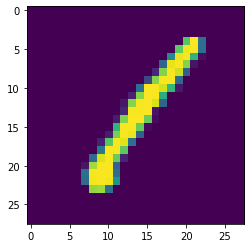

In [38]:
import matplotlib.pyplot as plt
grid_data=train_data_x.iloc[0,:]
grid_data=grid_data.values.reshape(28,28)
plt.imshow(grid_data)
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV,KFold

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(train_data_x,labels, test_size=0.10, random_state=42)

In [42]:
X_train.shape

(37800, 784)

In [43]:
gc.collect()

2814

In [44]:
X_train.values[0].max()

255

## Scaling

In [45]:
X_train=X_train/255
X_test=X_test/255

In [46]:
X_train.values[0].max()

1.0

## Dimension Reduction 

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca=PCA(150)
X_train=pca.fit_transform(X_train)

## Building Model

In [50]:
from sklearn.svm import SVC

In [51]:
model1=SVC(verbose=1)
model1.fit(X_train,y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=1)

In [52]:
pred=model1.predict(pca.transform(X_test))

## Evaluating model

In [53]:
from sklearn import metrics

In [54]:
metrics.accuracy_score(y_test,pred)

0.9785714285714285

In [57]:
metrics.confusion_matrix(y_test,pred)

array([[404,   0,   0,   0,   0,   0,   3,   0,   1,   0],
       [  0, 470,   0,   0,   0,   0,   0,   1,   0,   0],
       [  1,   0, 410,   0,   4,   0,   0,   2,   3,   0],
       [  0,   1,   1, 491,   0,   5,   0,   3,   3,   2],
       [  0,   0,   1,   0, 386,   1,   1,   1,   0,   7],
       [  1,   0,   0,   5,   0, 330,   1,   0,   1,   1],
       [  2,   0,   1,   0,   0,   0, 396,   0,   3,   0],
       [  0,   2,   3,   0,   2,   0,   0, 427,   1,   3],
       [  1,   1,   2,   3,   2,   1,   0,   1, 392,   0],
       [  1,   0,   1,   5,   0,   0,   0,   3,   2, 404]], dtype=int64)

In [71]:
pd.DataFrame({'True':y_test,'Prediction':pred})

,True,Prediction
5457,8,8
38509,1,1
25536,9,9
31803,9,9
39863,8,8
...,...,...
16041,4,4
4867,2,2
28123,7,7
3780,7,7


## Prediction

In [59]:
test_set=pca.transform(test_data)

In [60]:
test_prediction=model1.predict(test_set)

In [61]:
final_df=pd.DataFrame({'ImageId':range(1,28001),'Label':test_prediction})

In [62]:
final_df=final_df.set_index('ImageId')

In [63]:
final_df=final_df.to_csv('test_label_svm')

## Testing with own handwritten Digit

In [72]:
from skimage.color import rgb2gray

In [73]:
rbg_img=plt.imread('7img.png')

In [74]:
img_data=rgb2gray(rbg_img)

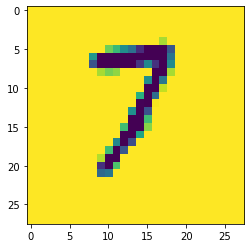

In [75]:
plt.imshow(img_data)

In [77]:
img_data=img_data.reshape(1,784)

In [78]:
model1.predict(pca.transform(img_data))

array([5], dtype=int64)